In [1]:
!pip install emoji

In [2]:
import numpy as np
import pandas as pd

In [3]:
train= pd.read_csv("train_emoji.csv", header=None)
train.drop(labels=[2, 3], axis=1, inplace=True)
test= pd.read_csv("test_emoji.csv", header= None)
train.head()

,0,1
0,never talk to me again,3
1,I am proud of your achievements,2
2,It is the worst day in my life,3
3,Miss you so much,0
4,food is life,4


In [4]:
test.head()

,0,1
0,I want to eat\t,4
1,he did not answer\t,3
2,he got a raise\t,2
3,she got me a present\t,0
4,ha ha ha it was so funny\t,2


In [5]:
import emoji as emoji

In [6]:
emoji_dictionary = {"0": "\u2764\uFE0F",    # :heart: prints a black instead of red heart depending on the font
                    "1": ":baseball:",
                    "2": ":beaming_face_with_smiling_eyes:",
                    "3": ":downcast_face_with_sweat:",
                    "4": ":fork_and_knife:"
                   }

In [7]:
emoji.emojize(":grinning_face:")

'😀'

In [8]:
for e in emoji_dictionary.values():
    print(emoji.emojize(e))

❤️
⚾
😁
😓
🍴


In [9]:
data = train.values
for i in range(25):
    print(data[i][0],emoji.emojize(emoji_dictionary[str(data[i][1])]))

never talk to me again 😓
I am proud of your achievements 😁
It is the worst day in my life 😓
Miss you so much ❤️
food is life 🍴
I love you mum ❤️
Stop saying bullshit 😓
congratulations on your acceptance 😁
The assignment is too long  😓
I want to go play ⚾
she did not answer my text  😓
Your stupidity has no limit 😓
how many points did he score ⚾
my algorithm performs poorly 😓
I got approved 😁
Stop shouting at me 😓
Sounds like a fun plan ha ha 😁
no one likes him 😓
the game just finished ⚾
I will celebrate soon 😁
So sad you are not coming 😓
She is my dearest love ❤️
Good job 😁
It was funny lol 😁
candy is life  😁


In [39]:
from keras.utils import to_categorical

X_train= train[0]
Y_train= train[1]

X_test= test[0]
Y_test= test[1]
    
Y_train = to_categorical(Y_train)
Y_test= to_categorical(Y_test)

X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)
X_train= np.asarray(X_train)
Y_train= np.asarray(Y_train)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

print(Y_test[4])

(132,)
(56,)
(132, 5)
(56, 5)
[0. 0. 1. 0. 0.]


In [41]:
embeddings = {}
with open(r'glove.6B.50d.txt',encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:],dtype='float32')

        embeddings[word] = coeffs

In [42]:
def getOutputEmbeddings(X):
    
    embedding_matrix_output = np.zeros((X.shape[0],10,50))
    for ix in range(X.shape[0]):
        X[ix] = X[ix].split()
        for jx in range(len(X[ix])):
            embedding_matrix_output[ix][jx] = embeddings[X[ix][jx].lower()]
            
    return embedding_matrix_output

In [43]:
def listToString(s):
    str1 = " "
    return (str1.join(s))

In [54]:
print(X_train[0])

n                               e                               v                               e                               r                               t                               a                               l                               k                               t                               o                               m                               e                               a                               g                               a                               i                               n


In [28]:
emb_XTrain= getOutputEmbeddings(X_train)
emb_XTest= getOutputEmbeddings(X_test)

IndexError: index 10 is out of bounds for axis 0 with size 10

In [171]:
print(emb_XTrain.shape)
print(emb_XTest.shape)

(132, 10, 50)
(56, 10, 50)


In [172]:
from tensorflow.keras.layers import LSTM, Dropout, Dense, Activation
from tensorflow.keras.models import Sequential

In [173]:
model = Sequential()
model.add(LSTM(64,input_shape=(10,50),return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(64,input_shape=(10,50)))
model.add(Dropout(0.3))
model.add(Dense(5))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 10, 64)            29440     
                                                                 
 dropout_8 (Dropout)         (None, 10, 64)            0         
                                                                 
 lstm_9 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 5)                 325       
                                                                 
 activation_4 (Activation)   (None, 5)                 0         
                                                                 
Total params: 62,789
Trainable params: 62,789
Non-trai

In [174]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history= model.fit(emb_XTrain,Y_train,batch_size=32,epochs=100,shuffle=True,validation_split=0.1)

Epoch 1/100
4/4 [==============================] - 4s 240ms/step - loss: 1.5952 - acc: 0.2712 - val_loss: 1.6219 - val_acc: 0.2857
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 1.5543 - acc: 0.3644 - val_loss: 1.6679 - val_acc: 0.0714
Epoch 3/100
4/4 [==============================] - 0s 16ms/step - loss: 1.5089 - acc: 0.3390 - val_loss: 1.6814 - val_acc: 0.0714
Epoch 4/100
4/4 [==============================] - 0s 16ms/step - loss: 1.5083 - acc: 0.3051 - val_loss: 1.6639 - val_acc: 0.0714
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 1.4683 - acc: 0.3983 - val_loss: 1.6168 - val_acc: 0.2857
Epoch 6/100
4/4 [==============================] - 0s 17ms/step - loss: 1.4310 - acc: 0.3729 - val_loss: 1.5812 - val_acc: 0.2143
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 1.3966 - acc: 0.3898 - val_loss: 1.5110 - val_acc: 0.2857
Epoch 8/100
4/4 [==============================] - 0s 17ms/step - loss: 1.3186 - acc: 0.5

4/4 [==============================] - 0s 16ms/step - loss: 0.0115 - acc: 1.0000 - val_loss: 0.8933 - val_acc: 0.7857
Epoch 64/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0087 - acc: 1.0000 - val_loss: 0.9979 - val_acc: 0.7857
Epoch 65/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0062 - acc: 1.0000 - val_loss: 0.9849 - val_acc: 0.7857
Epoch 66/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0081 - acc: 1.0000 - val_loss: 1.2003 - val_acc: 0.6429
Epoch 67/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0060 - acc: 1.0000 - val_loss: 1.2021 - val_acc: 0.5714
Epoch 68/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0056 - acc: 1.0000 - val_loss: 1.0874 - val_acc: 0.7857
Epoch 69/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0050 - acc: 1.0000 - val_loss: 0.9260 - val_acc: 0.7857
Epoch 70/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0057 - acc: 1.0000 - 

In [175]:
pred= model.predict_classes(emb_XTest)
float(sum(pred==Y_test))/emb_XTest.shape[0]

AttributeError: 'Sequential' object has no attribute 'predict_classes'

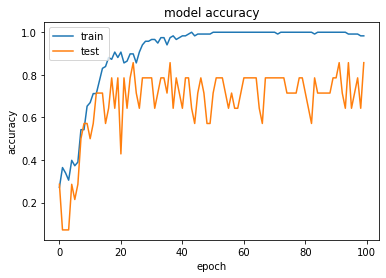

In [176]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

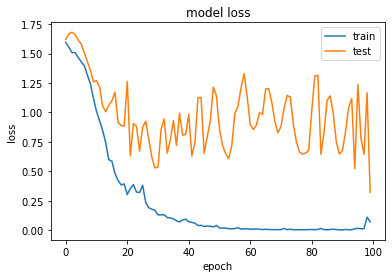

In [177]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [178]:
X_test = np.asarray(X_test).astype(np.float32)
Y_test = np.asarray(Y_test).astype(np.float32)
predictions = model.predict(X_test)

ValueError: setting an array element with a sequence.